<font size="5"> <center> ${\text{Binary Regression: Happiness}}$ </font>

In [124]:
import numpy as np, pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

Reading the dataframe as df and checking the shape and the head

In [125]:
df = pd.read_excel("Cleaning & Variables selection/Final - Selected Variables.xlsx", sheet_name='Edited')
print(df.shape)
df.head()

(2745, 37)


,INTERNET_USE,SCORE_PEOPLE_TRUST,SCORE_PEOPLE_FAIR,SAYING_IN_POLITICS,TRUST_LEGAL_SYSTEM,TRUST_POLICE,TRUST_POLITICIANS,SATISFACTION_LIFE,SATISFACTION_ECONOMY,SATISFACTION_GOVERNMENT,...,AGE,HAD_DIVORCED,MARITAL_STATUS,HAD_CHILDREN,DOMICILE,EDUCATION_YEARS,IS_WORKING,IS_STUDYING,IS_UNEMPLOYED,IS_RETIRED
0,4.0,2.0,3.0,1.0,6.0,7.0,4.0,8.0,4.0,7.0,...,38.0,0.0,1.0,NaN,4.0,13.0,0,0,0,0
1,5.0,5.0,5.0,4.0,NaN,7.0,NaN,NaN,NaN,7.0,...,17.0,0.0,6.0,0.0,4.0,10.0,0,0,0,0
2,5.0,4.0,4.0,2.0,7.0,6.0,5.0,8.0,5.0,5.0,...,28.0,0.0,6.0,0.0,3.0,15.0,1,0,0,0
3,5.0,6.0,6.0,2.0,8.0,6.0,5.0,8.0,4.0,6.0,...,29.0,0.0,6.0,0.0,4.0,20.0,1,0,0,0
4,5.0,2.0,3.0,3.0,5.0,8.0,0.0,7.0,5.0,9.0,...,45.0,0.0,1.0,NaN,4.0,8.0,1,0,0,0


### Data Cleaning

Inspecting the null values in the dataset

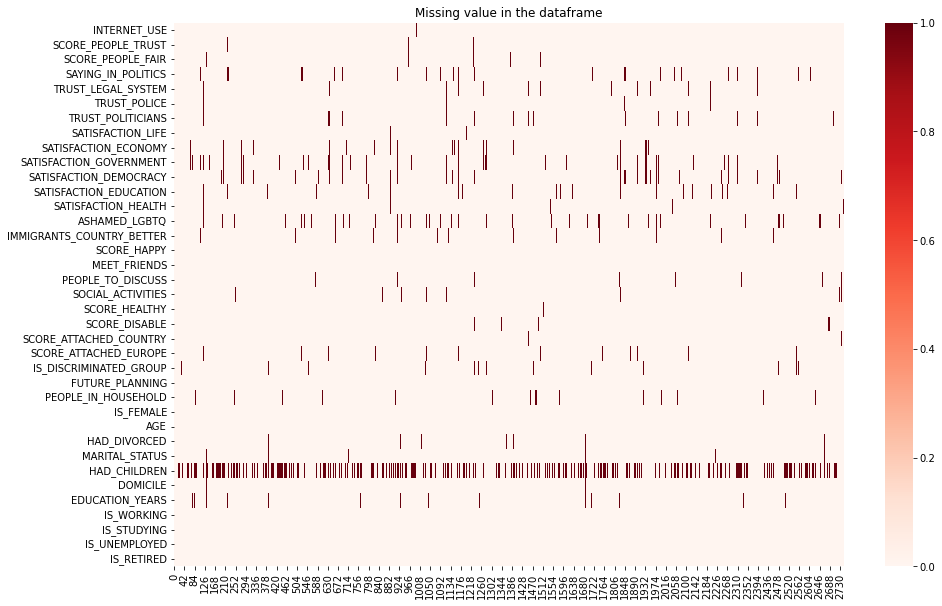

In [126]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isna().transpose(),
            cmap="Reds")
plt.title('Missing value in the dataframe')
plt.show()

Lets remove the na values and run our first iteration to find the varaibles that impact the happiness variable a lot

In [127]:
df.loc[df.SCORE_HAPPY <=5, "HAPPY"] = 0
df.loc[df.SCORE_HAPPY >=6, "HAPPY"] = 1

In [128]:
df.loc[df['AGE']<=25, 'AGE_GROUP'] = 'youth'
df.loc[df['AGE'].between(26,45), 'AGE_GROUP'] = 'middle_age_adults'
df.loc[df['AGE'].between(46,60), 'AGE_GROUP'] = 'adults'
df.loc[df['AGE']>61, 'AGE_GROUP'] = 'older_adult'
df.drop(columns=['AGE'], inplace=True)
df.drop(columns=['AGE_GROUP'], inplace=True)

## First Iteration

In [129]:
first_iteration_df = df.copy()
first_iteration_df=df.dropna(axis=0)

In [130]:
first_iteration_df.shape

(1291, 37)

we can see tha the dataset has almost dropped down to half after dropping the values based on missing values

In [131]:
first_iteration_df.isnull().sum().sort_values()

INTERNET_USE                 0
SCORE_DISABLE                0
SCORE_ATTACHED_COUNTRY       0
SCORE_ATTACHED_EUROPE        0
IS_DISCRIMINATED_GROUP       0
FUTURE_PLANNING              0
PEOPLE_IN_HOUSEHOLD          0
IS_FEMALE                    0
HAD_DIVORCED                 0
MARITAL_STATUS               0
HAD_CHILDREN                 0
DOMICILE                     0
EDUCATION_YEARS              0
IS_WORKING                   0
IS_STUDYING                  0
IS_UNEMPLOYED                0
SCORE_HEALTHY                0
IS_RETIRED                   0
SOCIAL_ACTIVITIES            0
MEET_FRIENDS                 0
SCORE_PEOPLE_TRUST           0
SCORE_PEOPLE_FAIR            0
SAYING_IN_POLITICS           0
TRUST_LEGAL_SYSTEM           0
TRUST_POLICE                 0
TRUST_POLITICIANS            0
SATISFACTION_LIFE            0
SATISFACTION_ECONOMY         0
SATISFACTION_GOVERNMENT      0
SATISFACTION_DEMOCRACY       0
SATISFACTION_EDUCATION       0
SATISFACTION_HEALTH          0
ASHAMED_

In [132]:
first_iteration_df.head()

,INTERNET_USE,SCORE_PEOPLE_TRUST,SCORE_PEOPLE_FAIR,SAYING_IN_POLITICS,TRUST_LEGAL_SYSTEM,TRUST_POLICE,TRUST_POLITICIANS,SATISFACTION_LIFE,SATISFACTION_ECONOMY,SATISFACTION_GOVERNMENT,...,HAD_DIVORCED,MARITAL_STATUS,HAD_CHILDREN,DOMICILE,EDUCATION_YEARS,IS_WORKING,IS_STUDYING,IS_UNEMPLOYED,IS_RETIRED,HAPPY
2,5.0,4.0,4.0,2.0,7.0,6.0,5.0,8.0,5.0,5.0,...,0.0,6.0,0.0,3.0,15.0,1,0,0,0,1.0
3,5.0,6.0,6.0,2.0,8.0,6.0,5.0,8.0,4.0,6.0,...,0.0,6.0,0.0,4.0,20.0,1,0,0,0,1.0
5,2.0,5.0,4.0,2.0,5.0,8.0,5.0,3.0,5.0,5.0,...,0.0,6.0,0.0,4.0,14.0,0,0,0,0,0.0
6,4.0,7.0,7.0,2.0,6.0,8.0,4.0,6.0,4.0,5.0,...,0.0,6.0,0.0,3.0,14.0,0,0,1,0,1.0
7,5.0,7.0,6.0,2.0,4.0,6.0,3.0,8.0,3.0,6.0,...,0.0,6.0,0.0,4.0,15.0,1,0,0,0,1.0


In [133]:
first_iteration_df.loc[first_iteration_df.SCORE_HAPPY <=5, "HAPPY"] = 0
first_iteration_df.loc[first_iteration_df.SCORE_HAPPY >=6, "HAPPY"] = 1

Preparing the X and y for fitting the logistic regression model

In [134]:
y=first_iteration_df['HAPPY']
X=first_iteration_df.loc[:, ~first_iteration_df.columns.isin(['SCORE_HAPPY','HAPPY'])]

In [135]:
X.head()

,INTERNET_USE,SCORE_PEOPLE_TRUST,SCORE_PEOPLE_FAIR,SAYING_IN_POLITICS,TRUST_LEGAL_SYSTEM,TRUST_POLICE,TRUST_POLITICIANS,SATISFACTION_LIFE,SATISFACTION_ECONOMY,SATISFACTION_GOVERNMENT,...,IS_FEMALE,HAD_DIVORCED,MARITAL_STATUS,HAD_CHILDREN,DOMICILE,EDUCATION_YEARS,IS_WORKING,IS_STUDYING,IS_UNEMPLOYED,IS_RETIRED
2,5.0,4.0,4.0,2.0,7.0,6.0,5.0,8.0,5.0,5.0,...,0,0.0,6.0,0.0,3.0,15.0,1,0,0,0
3,5.0,6.0,6.0,2.0,8.0,6.0,5.0,8.0,4.0,6.0,...,1,0.0,6.0,0.0,4.0,20.0,1,0,0,0
5,2.0,5.0,4.0,2.0,5.0,8.0,5.0,3.0,5.0,5.0,...,0,0.0,6.0,0.0,4.0,14.0,0,0,0,0
6,4.0,7.0,7.0,2.0,6.0,8.0,4.0,6.0,4.0,5.0,...,1,0.0,6.0,0.0,3.0,14.0,0,0,1,0
7,5.0,7.0,6.0,2.0,4.0,6.0,3.0,8.0,3.0,6.0,...,1,0.0,6.0,0.0,4.0,15.0,1,0,0,0


In [136]:
# Logit Model
Logit_mod = sm.Logit(y, X)
Logit_res = Logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.262696
         Iterations 7


The model converges after 7 iterations

In [137]:
print(Logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                  HAPPY   No. Observations:                 1291
Model:                          Logit   Df Residuals:                     1256
Method:                           MLE   Df Model:                           34
Date:                Mon, 14 Mar 2022   Pseudo R-squ.:                  0.3926
Time:                        12:05:12   Log-Likelihood:                -339.14
converged:                       True   LL-Null:                       -558.30
Covariance Type:            nonrobust   LLR p-value:                 9.613e-72
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
INTERNET_USE                  0.0544      0.092      0.590      0.555      -0.126       0.235
SCORE_PEOPLE_TRUST            0.0614      0.062      0.997      0.319      -0.059     

Lets check the pvalues for the variables to remove the statistically insignificant variables

In [138]:
coefs = pd.DataFrame({
    'coef': Logit_res.params.values,
    'odds ratio': np.exp(Logit_res.params.values),
    'pvalue': Logit_res.pvalues,
    'name': Logit_res.params.index
}).sort_values(by='pvalue', ascending=False)
coefs


,coef,odds ratio,pvalue,name
IMMIGRANTS_COUNTRY_BETTER,0.004309,1.004319,9.339150e-01,IMMIGRANTS_COUNTRY_BETTER
SAYING_IN_POLITICS,-0.023057,0.977207,8.896554e-01,SAYING_IN_POLITICS
DOMICILE,0.024119,1.024413,7.994202e-01,DOMICILE
SATISFACTION_GOVERNMENT,0.020988,1.021210,7.213115e-01,SATISFACTION_GOVERNMENT
SCORE_PEOPLE_FAIR,0.023931,1.024220,7.012229e-01,SCORE_PEOPLE_FAIR
EDUCATION_YEARS,0.015709,1.015833,6.081304e-01,EDUCATION_YEARS
INTERNET_USE,0.054383,1.055889,5.554206e-01,INTERNET_USE
IS_DISCRIMINATED_GROUP,-0.324630,0.722795,5.420995e-01,IS_DISCRIMINATED_GROUP
PEOPLE_TO_DISCUSS,-0.057877,0.943766,5.169519e-01,PEOPLE_TO_DISCUSS
TRUST_POLITICIANS,-0.040736,0.960082,5.084245e-01,TRUST_POLITICIANS


In [139]:
selected_features = list(coefs[coefs['pvalue']<0.05].index)

In [140]:
selected_features

['FUTURE_PLANNING',
 'IS_RETIRED',
 'SATISFACTION_EDUCATION',
 'SATISFACTION_DEMOCRACY',
 'MARITAL_STATUS',
 'HAD_CHILDREN',
 'SCORE_DISABLE',
 'SATISFACTION_HEALTH',
 'SCORE_HEALTHY',
 'SATISFACTION_LIFE']

## Second Iteration

### Cleaning the variables

We can see that the above 10 variables are most important. Lets check the number of missing values in the initial dataset and try creating dummies for the null values inorder to not loose any information about the people who prefered to not answer these questions

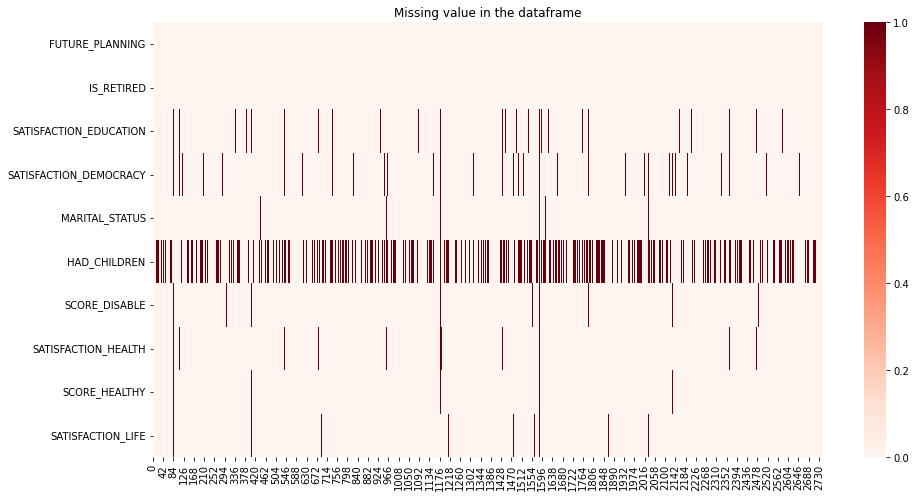

In [141]:
plt.figure(figsize=(15,8))
sns.heatmap(df.loc[:,selected_features].isna().transpose(),
            cmap="Reds")
plt.title('Missing value in the dataframe')
plt.show()

We can see that these variables has lot of null values and lets just create a dummy variables to input the respondents preference to not answer also into the model

lets check the values in these datatypes so that we can fill the nas sensibly

In [142]:
df.loc[:,selected_features].agg(['min', 'max','dtypes']).transpose()

,min,max,dtypes
FUTURE_PLANNING,0,10,int64
IS_RETIRED,0,1,int64
SATISFACTION_EDUCATION,0.0,10.0,float64
SATISFACTION_DEMOCRACY,0.0,10.0,float64
MARITAL_STATUS,1.0,6.0,float64
HAD_CHILDREN,0.0,1.0,float64
SCORE_DISABLE,1.0,3.0,float64
SATISFACTION_HEALTH,0.0,10.0,float64
SCORE_HEALTHY,1.0,5.0,float64
SATISFACTION_LIFE,0.0,10.0,float64


Converting Age to categorical variable

Since the distribution is almost evenly distributed, we can classify age as categories

In [143]:
selected_features.append('HAPPY')

In [144]:
first_iteration_cleaned_df=df[selected_features].copy()

In [145]:
first_iteration_cleaned_df.head()

,FUTURE_PLANNING,IS_RETIRED,SATISFACTION_EDUCATION,SATISFACTION_DEMOCRACY,MARITAL_STATUS,HAD_CHILDREN,SCORE_DISABLE,SATISFACTION_HEALTH,SCORE_HEALTHY,SATISFACTION_LIFE,HAPPY
0,9,0,6.0,5.0,1.0,NaN,2.0,0.0,3.0,8.0,1.0
1,6,0,8.0,NaN,6.0,0.0,2.0,5.0,3.0,NaN,0.0
2,3,0,5.0,4.0,6.0,0.0,3.0,3.0,2.0,8.0,1.0
3,2,0,4.0,6.0,6.0,0.0,3.0,4.0,2.0,8.0,1.0
4,10,0,7.0,6.0,1.0,NaN,3.0,2.0,3.0,7.0,1.0


Dealing with missing values for different types of variables.<br><br>
<b> For Categorical Variables</b><br>
Variables such as `HAD_CHILDREN`, `PEOPLE_IN_HOUSEHOLD`, `MARITAL_STATUS` need to be converted into categorical variables. SO we can fill these variables with some variable out of range and then convert these into dummy variables

In [146]:
first_iteration_cleaned_df.loc[first_iteration_cleaned_df.HAD_CHILDREN.isna(), "HAD_CHILDREN"] = 2.0
first_iteration_cleaned_df.loc[first_iteration_cleaned_df.MARITAL_STATUS.isna(), "MARITAL_STATUS"] = 7.0

In [147]:
def get_dummies_for_columns(dataframe,column_name,na_name):
    dataframe.head()
    dummy = pd.get_dummies(dataframe[column_name],drop_first=True)
    for i in dummy.columns:
        dummy[i] = dummy[i].astype('float64')
    dummy.columns =[column_name +'_' + str(col) for col in dummy.columns]
    dummy.rename(columns={column_name +'_' +str(na_name) :column_name+'_na'},inplace=True)
    dataframe.drop(columns=[column_name], inplace=True)
    dataframe = dataframe.join(dummy)
    return dataframe

In [148]:
first_iteration_cleaned_df=get_dummies_for_columns(first_iteration_cleaned_df,'HAD_CHILDREN',2.0)
first_iteration_cleaned_df=get_dummies_for_columns(first_iteration_cleaned_df,'MARITAL_STATUS',7.0)

In [149]:
first_iteration_cleaned_df.head().transpose()

,0,1,2,3,4
FUTURE_PLANNING,9.0,6.0,3.0,2.0,10.0
IS_RETIRED,0.0,0.0,0.0,0.0,0.0
SATISFACTION_EDUCATION,6.0,8.0,5.0,4.0,7.0
SATISFACTION_DEMOCRACY,5.0,NaN,4.0,6.0,6.0
SCORE_DISABLE,2.0,2.0,3.0,3.0,3.0
SATISFACTION_HEALTH,0.0,5.0,3.0,4.0,2.0
SCORE_HEALTHY,3.0,3.0,2.0,2.0,3.0
SATISFACTION_LIFE,8.0,NaN,8.0,8.0,7.0
HAPPY,1.0,0.0,1.0,1.0,1.0
HAD_CHILDREN_1.0,0.0,0.0,0.0,0.0,0.0


Lets check the numer of missing values now

In [150]:
first_iteration_cleaned_df.isna().sum()

FUTURE_PLANNING             0
IS_RETIRED                  0
SATISFACTION_EDUCATION     97
SATISFACTION_DEMOCRACY    127
SCORE_DISABLE              21
SATISFACTION_HEALTH        33
SCORE_HEALTHY               9
SATISFACTION_LIFE          33
HAPPY                      12
HAD_CHILDREN_1.0            0
HAD_CHILDREN_na             0
MARITAL_STATUS_2.0          0
MARITAL_STATUS_3.0          0
MARITAL_STATUS_4.0          0
MARITAL_STATUS_5.0          0
MARITAL_STATUS_6.0          0
MARITAL_STATUS_na           0
dtype: int64

Lets try dropping the na variables and try modelling

In [151]:
second_iteration_cleaned_df=first_iteration_cleaned_df.dropna(axis=0)

In [152]:
second_iteration_cleaned_df.shape

(2508, 17)

We have 91% of our original observations now.

Lets try second iteration now.

In [153]:
y=second_iteration_cleaned_df['HAPPY']
X=second_iteration_cleaned_df.loc[:, ~second_iteration_cleaned_df.columns.isin(['HAPPY'])]

In [154]:
X

,FUTURE_PLANNING,IS_RETIRED,SATISFACTION_EDUCATION,SATISFACTION_DEMOCRACY,SCORE_DISABLE,SATISFACTION_HEALTH,SCORE_HEALTHY,SATISFACTION_LIFE,HAD_CHILDREN_1.0,HAD_CHILDREN_na,MARITAL_STATUS_2.0,MARITAL_STATUS_3.0,MARITAL_STATUS_4.0,MARITAL_STATUS_5.0,MARITAL_STATUS_6.0,MARITAL_STATUS_na
0,9,0,6.0,5.0,2.0,0.0,3.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,5.0,4.0,3.0,3.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2,0,4.0,6.0,3.0,4.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,10,0,7.0,6.0,3.0,2.0,3.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,10,0,7.0,6.0,3.0,9.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2739,4,0,5.0,4.0,3.0,6.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2740,0,1,7.0,2.0,3.0,8.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2741,1,1,6.0,5.0,3.0,6.0,2.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2742,3,1,5.0,4.0,3.0,6.0,2.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [155]:
y

0       1.0
2       1.0
3       1.0
4       1.0
5       0.0
       ... 
2739    1.0
2740    1.0
2741    1.0
2742    1.0
2743    1.0
Name: HAPPY, Length: 2508, dtype: float64

In [156]:
X.sum()

FUTURE_PLANNING           11981.0
IS_RETIRED                  630.0
SATISFACTION_EDUCATION    13919.0
SATISFACTION_DEMOCRACY    12872.0
SCORE_DISABLE              7128.0
SATISFACTION_HEALTH       14418.0
SCORE_HEALTHY              5412.0
SATISFACTION_LIFE         17385.0
HAD_CHILDREN_1.0            525.0
HAD_CHILDREN_na             916.0
MARITAL_STATUS_2.0           24.0
MARITAL_STATUS_3.0           74.0
MARITAL_STATUS_4.0          101.0
MARITAL_STATUS_5.0          196.0
MARITAL_STATUS_6.0          786.0
MARITAL_STATUS_na            23.0
dtype: float64

In [157]:
# Logit Model
Logit_mod = sm.Logit(y, X)
Logit_res = Logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.273144
         Iterations 8


In [158]:
print(Logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                  HAPPY   No. Observations:                 2508
Model:                          Logit   Df Residuals:                     2492
Method:                           MLE   Df Model:                           15
Date:                Mon, 14 Mar 2022   Pseudo R-squ.:                  0.3568
Time:                        12:05:14   Log-Likelihood:                -685.04
converged:                       True   LL-Null:                       -1065.0
Covariance Type:            nonrobust   LLR p-value:                3.102e-152
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
FUTURE_PLANNING           -0.1120      0.025     -4.451      0.000      -0.161      -0.063
IS_RETIRED                -0.3702      0.197     -1.881      0.060      -0.756       0.015
SATI

In [159]:
coefs = pd.DataFrame({
    'coef': Logit_res.params.values,
    'odds ratio': np.exp(Logit_res.params.values),
    'pvalue': Logit_res.pvalues,
    'name': Logit_res.params.index
}).sort_values(by='pvalue', ascending=False)
coefs


,coef,odds ratio,pvalue,name
SATISFACTION_DEMOCRACY,0.008564,1.008601,8.209693e-01,SATISFACTION_DEMOCRACY
MARITAL_STATUS_2.0,1.074456,2.928400,3.841887e-01,MARITAL_STATUS_2.0
HAD_CHILDREN_na,-0.235163,0.790442,2.279702e-01,HAD_CHILDREN_na
IS_RETIRED,-0.370168,0.690618,5.993975e-02,IS_RETIRED
HAD_CHILDREN_1.0,-0.449466,0.637969,3.673933e-02,HAD_CHILDREN_1.0
MARITAL_STATUS_3.0,-0.827056,0.437335,2.174503e-02,MARITAL_STATUS_3.0
MARITAL_STATUS_4.0,-0.758086,0.468562,1.402654e-02,MARITAL_STATUS_4.0
MARITAL_STATUS_na,-1.604593,0.200971,6.316612e-03,MARITAL_STATUS_na
SATISFACTION_EDUCATION,0.117368,1.124533,3.354124e-03,SATISFACTION_EDUCATION
SCORE_DISABLE,-0.292527,0.746375,3.184011e-03,SCORE_DISABLE


In [160]:
selected_features_2 = list(coefs[coefs['pvalue']<0.05].index)

In [161]:
selected_features_2

['HAD_CHILDREN_1.0',
 'MARITAL_STATUS_3.0',
 'MARITAL_STATUS_4.0',
 'MARITAL_STATUS_na',
 'SATISFACTION_EDUCATION',
 'SCORE_DISABLE',
 'MARITAL_STATUS_5.0',
 'MARITAL_STATUS_6.0',
 'SATISFACTION_HEALTH',
 'FUTURE_PLANNING',
 'SCORE_HEALTHY',
 'SATISFACTION_LIFE']

In [162]:
selected_features_2.append('HAPPY')

## Third Iteration

Keeping variables that are statistically significant from the second iteration

In [163]:
third_iteration_df=second_iteration_cleaned_df[selected_features_2].copy()

In [164]:
y=third_iteration_df['HAPPY']
X=third_iteration_df.loc[:, ~third_iteration_df.columns.isin(['HAPPY'])]

In [165]:
# Logit Model
Logit_mod = sm.Logit(y, X)
Logit_res = Logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.274214
         Iterations 7


In [166]:
print(Logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                  HAPPY   No. Observations:                 2508
Model:                          Logit   Df Residuals:                     2496
Method:                           MLE   Df Model:                           11
Date:                Mon, 14 Mar 2022   Pseudo R-squ.:                  0.3542
Time:                        12:05:15   Log-Likelihood:                -687.73
converged:                       True   LL-Null:                       -1065.0
Covariance Type:            nonrobust   LLR p-value:                1.083e-154
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
HAD_CHILDREN_1.0          -0.4119      0.177     -2.325      0.020      -0.759      -0.065
MARITAL_STATUS_3.0        -0.7416      0.356     -2.084      0.037      -1.439      -0.044
MARI

In [167]:
coefs = pd.DataFrame({
    'coef': Logit_res.params.values,
    'odds ratio': np.exp(Logit_res.params.values),
    'pvalue': Logit_res.pvalues,
}).sort_values(by='pvalue', ascending=False)
coefs


,coef,odds ratio,pvalue
MARITAL_STATUS_3.0,-0.741600,0.476351,3.714771e-02
MARITAL_STATUS_4.0,-0.689248,0.501953,2.437690e-02
HAD_CHILDREN_1.0,-0.411913,0.662382,2.008467e-02
MARITAL_STATUS_na,-1.553205,0.211569,7.481225e-03
MARITAL_STATUS_6.0,-0.541020,0.582154,2.995801e-03
SCORE_DISABLE,-0.297629,0.742577,1.743756e-03
SATISFACTION_EDUCATION,0.122255,1.130042,1.184476e-03
SATISFACTION_HEALTH,0.123855,1.131852,2.475387e-04
MARITAL_STATUS_5.0,-0.811860,0.444031,2.300177e-04
FUTURE_PLANNING,-0.113213,0.892961,6.406158e-06


Checking the convergence of the model

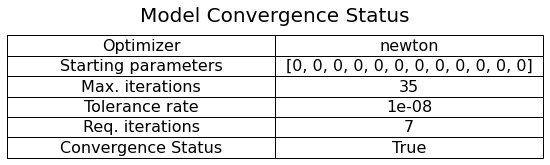

In [168]:
from Func_binaryreg import convergence
convergence(y,Logit_res)

Model converges at 8 Iterations

Odds Ratio

In [191]:
def oddsratioestimates(y,logit_res):
    freqy=y.value_counts()
    m=len(freqy)
    params = logit_res.params[1:len(logit_res.params)]
    conf = logit_res.conf_int()
    conf=conf.iloc[1:len(logit_res.params)]
    confodr=np.exp(conf)
    odr=np.exp(params.to_frame())
    odr=odr.rename(columns={0:'Point Estimate'})
    confodr=confodr.rename(columns={0:'5%', 1:'95%'})
    table=pd.concat([odr[['Point Estimate']], confodr[['5%','95%']]], axis=1)
    plt.subplot(313)
    plt.title('Odds Ratio Estimates',fontsize=15,y=2.5)
    plt.axis('off')
    plt.axis('tight')
    table.update(table.astype(float))
    table.update(table.applymap('{:,.3f}'.format))
    test=plt.table(cellText=table.values, colLabels=['Point Estimate', 'Lower CI (95% Wald)','Upper CI (95% Wald)'],  
                   rowLabels=table.index, loc='center',cellLoc='center',colWidths=[0.3,0.35,0.35])
    plt.axis('off')
    test.auto_set_font_size(False)
    test.set_fontsize(12) 
    test.scale(2, 1.7)
    print('!!ATTENTION: Odds ratio are only OK with the Logit link function!!')


!!ATTENTION: Odds ratio are only OK with the Logit link function!!


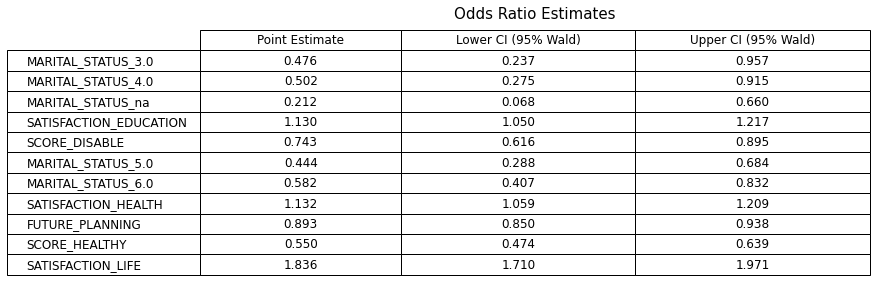

In [192]:
#from Func_binaryreg import oddsratioestimates
oddsratioestimates(y,Logit_res)

Marginal Effect for mean

In [195]:
ME_bymean=Logit_res.get_margeff(at='mean', method='dydx')
print(ME_bymean.summary())

        Logit Marginal Effects       
Dep. Variable:                  HAPPY
Method:                          dydx
At:                              mean
                            dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
HAD_CHILDREN_1.0          -0.0279      0.012     -2.331      0.020      -0.051      -0.004
MARITAL_STATUS_3.0        -0.0502      0.024     -2.080      0.038      -0.097      -0.003
MARITAL_STATUS_4.0        -0.0467      0.021     -2.247      0.025      -0.087      -0.006
MARITAL_STATUS_na         -0.1051      0.039     -2.669      0.008      -0.182      -0.028
SATISFACTION_EDUCATION     0.0083      0.003      3.240      0.001       0.003       0.013
SCORE_DISABLE             -0.0201      0.007     -3.083      0.002      -0.033      -0.007
MARITAL_STATUS_5.0        -0.0550      0.015     -3.638      0.000      -0.085      -0.025
MARITAL_STATUS_6.0        -0.

Testing the one or more variables

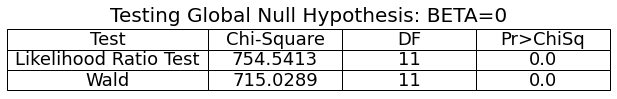

In [173]:
from Func_binaryreg import globalnull
globalnull(y,Logit_res)

WE can see that all the parameters combined is statistically significant model

Checking the goodness of the model

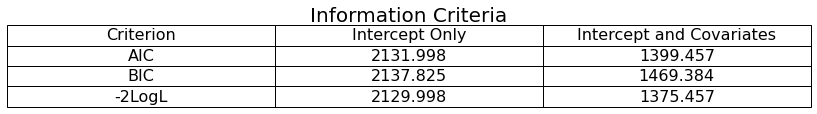

In [174]:
from Func_binaryreg import informationcriteria
informationcriteria(y,Logit_res)

We select the model with Intercept and Covariates

Checking the goodness of the fit

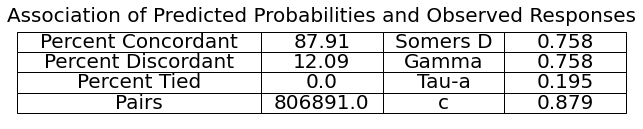

In [175]:
from Func_binaryreg import associationstat
associationstat(X, y, Logit_res)

We select the model with Intercept and Covariates